In [8]:
%matplotlib inline
import os
from IPython.core.display import HTML
def load_style(directory = '../', name='customMac.css'):  
        styles = open(os.path.join(directory, name), 'r').read()
        return HTML(styles)
load_style()

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rc
import math
import matplotlib.pylab as pylab

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (9,6),
         'axes.labelsize': 18,
         'axes.titlesize':18,
         'xtick.labelsize':18,
         'ytick.labelsize':18}
pylab.rcParams.update(params)
plt.rcParams.update({'font.size': 14})
rc('text', usetex=True)

## 2D-Histogram based Estimation

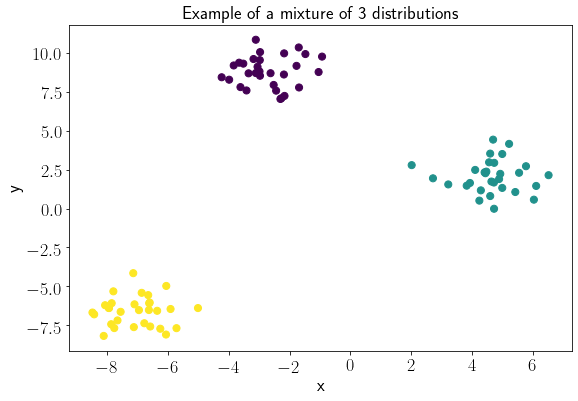

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
n_components = 3
X, truth = make_blobs(n_samples=90, centers=n_components, 
                      cluster_std = [1, 1, 1], 
                      random_state=42)
plt.scatter(X[:, 0], X[:, 1], s=50, c = truth)
plt.title(f"Example of a mixture of {n_components} distributions")
plt.xlabel("x")
plt.ylabel("y");
plt.savefig('outputs/Scatter2D.pdf')
plt.show()

In [11]:
print(X[truth==1])

[[ 6.52606474  2.1477475 ]
 [ 3.93782574  1.64550754]
 [ 4.42020695  2.33028226]
 [ 3.83138523  1.47141264]
 [ 4.60516707  0.80449165]
 [ 4.56786871  2.97670258]
 [ 4.89742923  1.89872377]
 [ 5.55528095  2.30192079]
 [ 4.29716432  1.17089241]
 [ 5.78270165  2.72510272]
 [ 6.04267315  0.57131862]
 [ 4.6040528   3.53781334]
 [ 4.24777068  0.50965474]
 [ 4.7269259   1.67416233]
 [ 4.47859312  2.37722054]
 [ 2.02013373  2.79507219]
 [ 4.44751787  2.27471703]
 [ 4.11011863  2.48643712]
 [ 6.11777288  1.45489947]
 [ 3.22450809  1.55252436]
 [ 4.73695639  2.94181467]
 [ 4.64499229  1.73858255]
 [ 5.43091078  1.06378223]
 [ 4.70010905  4.4364118 ]
 [ 5.00127444  3.51120625]
 [ 5.00151486  1.32804993]
 [ 5.22673593  4.16362531]
 [ 2.72110762  1.94665581]
 [ 4.93599911  2.23422496]
 [ 4.73163961 -0.01439923]]


In [12]:
# Extract x and y
x = X[:, 0]
y = X[:, 1]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

-9.988427942027611 8.027382253753744 -10.107279258266972 12.773277364614009


<IPython.core.display.Javascript object>


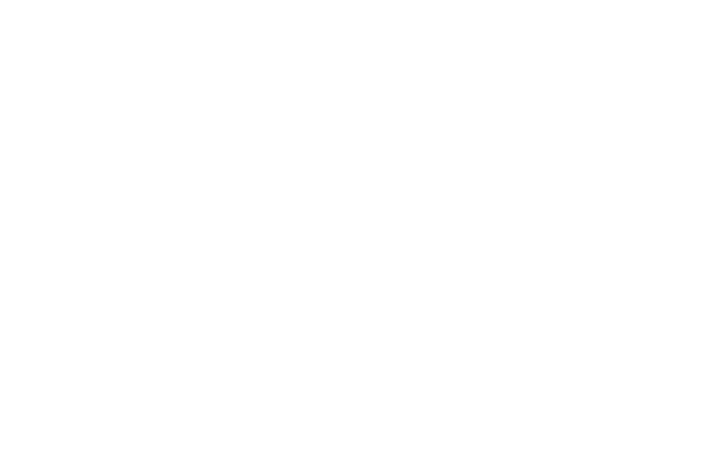

<IPython.core.display.Javascript object>


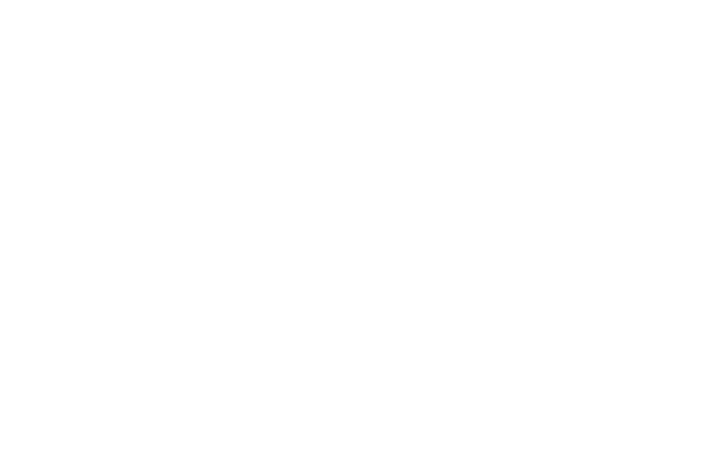

In [14]:
%matplotlib notebook

# This import registers the 3D projection, but is otherwise unused.
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import

import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
np.random.seed(19680801)


fig = plt.figure(figsize=(9, 6))
ax = fig.add_subplot(111, projection='3d')
x = X[:, 0]
y = X[:, 1]
# x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=16, range=[[-10, 8], [-10, 16]])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

# Construct arrays with the dimensions for the 16 bars.
dx =  0.6 * np.ones_like(zpos)
dy = 0.9 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('PDF')
plt.savefig('outputs/binHist2D.pdf')
plt.show()